In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold

In [655]:
url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'

career_dataset = pd.read_csv(url)
#pd.read_csv("../Datasets/career_pred.csv")

# 1.) Exploratory Data Analysis

In [656]:
career_dataset.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst


In [657]:
career_dataset.shape

(7525, 26)

In [658]:
career_dataset.columns

Index(['sslc', 'hsc', 'cgpa', 'school_type', 'no_of_miniprojects',
       'no_of_projects', 'coresub_skill', 'aptitude_skill',
       'problemsolving_skill', 'programming_skill', 'abstractthink_skill',
       'design_skill', 'first_computer', 'first_program', 'lab_programs',
       'ds_coding', 'technology_used', 'sympos_attend', 'sympos_won',
       'extracurricular', 'learning_style', 'college_bench',
       'clg_teachers_know', 'college_performence ', 'college_skills', 'ROLE'],
      dtype='object')

In [659]:
career_dataset.describe()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,lab_programs,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,college_bench,clg_teachers_know,college_performence,college_skills
count,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,...,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000
mean,2.907243,3.043056,2.138738,1.799070,1.537276,1.188439,1.513223,2.041196,2.863256,2.887442,...,3.584585,2.050498,1.204917,2.856877,1.972359,2.182990,3.988040,3.597874,3.350299,2.995748
std,0.939084,0.900414,0.803465,0.711248,0.735916,0.545728,0.499858,1.085477,0.728428,0.754894,...,0.790142,0.748276,0.574120,1.027328,1.002539,1.094488,0.778578,0.565860,0.522819,1.409500
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,...,4.000000,2.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000


In [660]:
career_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sslc                  7525 non-null   int64 
 1   hsc                   7525 non-null   int64 
 2   cgpa                  7525 non-null   int64 
 3   school_type           7525 non-null   int64 
 4   no_of_miniprojects    7525 non-null   int64 
 5   no_of_projects        7525 non-null   int64 
 6   coresub_skill         7525 non-null   int64 
 7   aptitude_skill        7525 non-null   int64 
 8   problemsolving_skill  7525 non-null   int64 
 9   programming_skill     7525 non-null   int64 
 10  abstractthink_skill   7525 non-null   int64 
 11  design_skill          7525 non-null   int64 
 12  first_computer        7525 non-null   int64 
 13  first_program         7525 non-null   int64 
 14  lab_programs          7525 non-null   int64 
 15  ds_coding             7525 non-null   

In [661]:
career_dataset.isnull().sum()

sslc                       0
hsc                        0
cgpa                       0
school_type                0
no_of_miniprojects         0
no_of_projects             0
coresub_skill              0
aptitude_skill             0
problemsolving_skill       0
programming_skill          0
abstractthink_skill        0
design_skill               0
first_computer             0
first_program              0
lab_programs               0
ds_coding                  0
technology_used            0
sympos_attend              0
sympos_won                 0
extracurricular            0
learning_style             0
college_bench              0
clg_teachers_know          0
college_performence        0
college_skills             0
ROLE                    7476
dtype: int64

In [662]:
X = career_dataset.iloc[:,:-1]
y = pd.DataFrame(career_dataset.iloc[:,-1])

In [663]:
X

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
0,2,3,2,3,1,1,1,1,2,4,...,1,1,3,1,2,2,4,3,4,5
1,3,1,2,2,2,1,1,3,2,4,...,2,2,3,2,3,2,5,3,3,4
2,3,4,2,2,1,1,1,2,3,3,...,1,1,4,3,1,4,3,3,3,4
3,3,4,2,1,1,1,1,1,3,2,...,2,1,3,2,1,2,1,4,4,3
4,2,3,2,4,1,1,1,4,3,3,...,2,1,2,1,3,1,5,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,4,1,4,2,2,1,4,4,3,3
7521,2,3,3,3,4,3,2,1,3,3,...,3,4,2,3,2,4,1,3,3,2
7522,3,2,1,2,1,1,1,2,2,3,...,2,1,3,1,1,3,5,3,3,4
7523,2,1,1,1,2,1,1,2,2,2,...,2,1,3,2,1,2,4,4,3,4


In [664]:
y

,ROLE
0,Technical Support
1,Software Developer
2,UI/UX Designer
3,Technical Support
4,Data Analyst
...,...
7520,NaN
7521,NaN
7522,NaN
7523,NaN


In [665]:
lable_encoder = LabelEncoder()

In [666]:
for feature in X.columns[9:]:
  X[feature] = lable_encoder.fit_transform(X[feature])

In [667]:
# y['Suggested Job Role'] = lable_encoder.fit_transform(y['Suggested Job Role'])
y['ROLE'] = lable_encoder.fit_transform(y['ROLE'])

In [668]:
X.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
0,2,3,2,3,1,1,1,1,2,3,...,0,0,2,0,1,1,3,2,3,4
1,3,1,2,2,2,1,1,3,2,3,...,1,1,2,1,2,1,4,2,2,3
2,3,4,2,2,1,1,1,2,3,2,...,0,0,3,2,0,3,2,2,2,3
3,3,4,2,1,1,1,1,1,3,1,...,1,0,2,1,0,1,0,3,3,2
4,2,3,2,4,1,1,1,4,3,2,...,1,0,1,0,2,0,4,3,2,0


In [669]:
y.head()

,ROLE
0,4
1,2
2,6
3,4
4,1


# 2.) Feature Selection

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [671]:
X_train.head()

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
3570,2,3,2,1,1,1,2,1,3,2,...,1,0,2,2,1,2,2,3,2,1
1937,3,3,1,1,1,1,1,2,3,2,...,0,0,2,0,2,1,2,3,2,0
7420,4,4,3,1,1,1,2,1,4,3,...,2,0,3,1,1,1,3,3,3,3
6344,4,3,2,1,1,1,1,2,3,1,...,1,0,2,1,0,1,4,2,2,0
857,4,4,4,1,2,1,2,3,3,2,...,1,1,2,2,2,0,4,3,3,3


In [672]:
y_train.head()

,ROLE
3570,8
1937,8
7420,8
6344,8
857,8


In [673]:
variance_threshold = VarianceThreshold(threshold=0)
vt_features = variance_threshold.fit(X_train)
vt_features.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [674]:
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1.25992216e-02, 7.01341934e-03, 7.15421473e-03, 1.47362783e-02,
       2.82148782e-02, 3.66939372e-02, 2.35973095e-02, 1.47490117e-02,
       0.00000000e+00, 1.51722252e-02, 1.66170889e-02, 1.29816877e-02,
       1.67218224e-02, 8.16245354e-03, 1.17553075e-02, 1.57287928e-02,
       2.16104335e-03, 1.32192498e-02, 2.49220079e-04, 4.80466545e-05,
       8.98561847e-03, 0.00000000e+00, 1.85795062e-02, 7.10265717e-03,
       1.08190627e-03])

In [675]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

sslc                    0.012599
hsc                     0.007013
cgpa                    0.007154
school_type             0.014736
no_of_miniprojects      0.028215
no_of_projects          0.036694
coresub_skill           0.023597
aptitude_skill          0.014749
problemsolving_skill    0.000000
programming_skill       0.015172
abstractthink_skill     0.016617
design_skill            0.012982
first_computer          0.016722
first_program           0.008162
lab_programs            0.011755
ds_coding               0.015729
technology_used         0.002161
sympos_attend           0.013219
sympos_won              0.000249
extracurricular         0.000048
learning_style          0.008986
college_bench           0.000000
clg_teachers_know       0.018580
college_performence     0.007103
college_skills          0.001082
dtype: float64

In [706]:
features_dataframe = pd.DataFrame(mutual_info, index=mutual_info.index, columns=['Mutual Information'])
features_dataframe

,Mutual Information
sslc,0.012599
hsc,0.007013
cgpa,0.007154
school_type,0.014736
no_of_miniprojects,0.028215
no_of_projects,0.036694
coresub_skill,0.023597
aptitude_skill,0.014749
problemsolving_skill,0.000000
programming_skill,0.015172


In [700]:
import plotly.express as px

In [708]:
fig =px.bar(features_dataframe, x=features_dataframe.index,y='Mutual Information')
fig.show()

<BarContainer object of 25 artists>

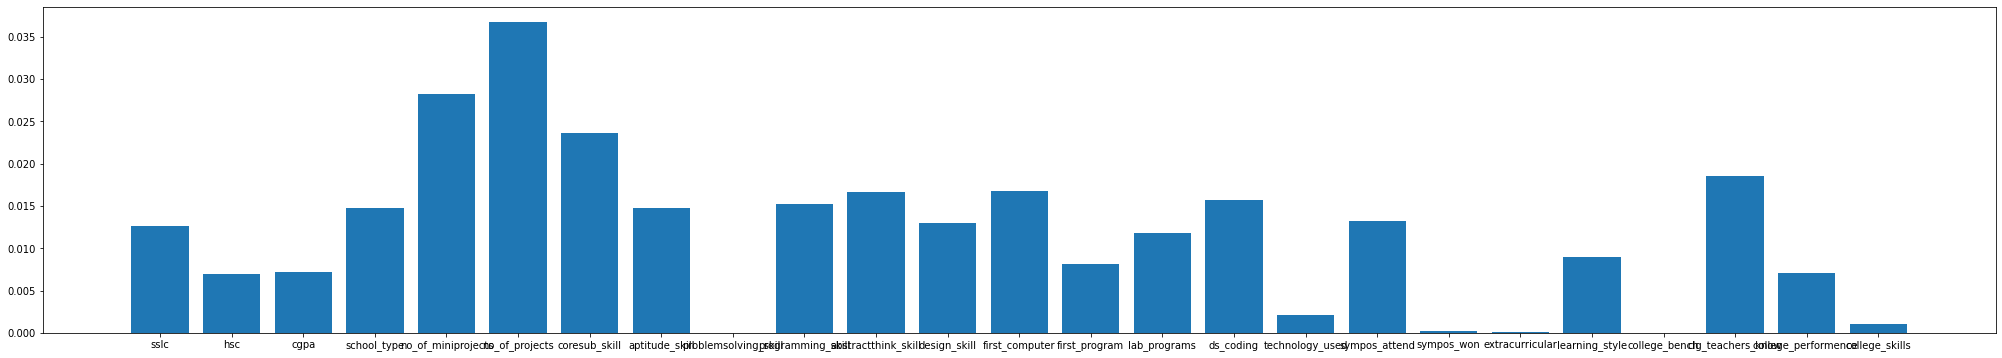

In [676]:
plt.figure(figsize=(35,6))
plt.bar(x=X_train.columns,height=mutual_info)

In [677]:
important_features = {}

In [678]:
for value in enumerate(mutual_info):
  if value[1] > 0:
    important_features[value[0]] = value[1]

In [679]:
important_features

{0: 0.012599221601132027,
 1: 0.007013419341836968,
 2: 0.007154214733479658,
 3: 0.014736278326804575,
 4: 0.028214878181240244,
 5: 0.03669393717223157,
 6: 0.023597309457481397,
 7: 0.014749011712035798,
 9: 0.015172225163641806,
 10: 0.016617088941469738,
 11: 0.012981687666590247,
 12: 0.016721822405853404,
 13: 0.008162453536891046,
 14: 0.011755307472696375,
 15: 0.015728792764633792,
 16: 0.002161043350470404,
 17: 0.013219249838429814,
 18: 0.0002492200793491328,
 19: 4.804665453150836e-05,
 20: 0.008985618471603174,
 22: 0.01857950624646698,
 23: 0.007102657165590109,
 24: 0.0010819062650279099}

In [680]:
important_features = mutual_info[important_features]

In [681]:
important_features

sslc                    0.012599
hsc                     0.007013
cgpa                    0.007154
school_type             0.014736
no_of_miniprojects      0.028215
no_of_projects          0.036694
coresub_skill           0.023597
aptitude_skill          0.014749
programming_skill       0.015172
abstractthink_skill     0.016617
design_skill            0.012982
first_computer          0.016722
first_program           0.008162
lab_programs            0.011755
ds_coding               0.015729
technology_used         0.002161
sympos_attend           0.013219
sympos_won              0.000249
extracurricular         0.000048
learning_style          0.008986
clg_teachers_know       0.018580
college_performence     0.007103
college_skills          0.001082
dtype: float64

In [682]:
important_features.sort_values(inplace=True,ascending=False)

In [683]:
important_features

no_of_projects          0.036694
no_of_miniprojects      0.028215
coresub_skill           0.023597
clg_teachers_know       0.018580
first_computer          0.016722
abstractthink_skill     0.016617
ds_coding               0.015729
programming_skill       0.015172
aptitude_skill          0.014749
school_type             0.014736
sympos_attend           0.013219
design_skill            0.012982
sslc                    0.012599
lab_programs            0.011755
learning_style          0.008986
first_program           0.008162
cgpa                    0.007154
college_performence     0.007103
hsc                     0.007013
technology_used         0.002161
college_skills          0.001082
sympos_won              0.000249
extracurricular         0.000048
dtype: float64

In [684]:
X_train = X_train[important_features.index[0:11]]

In [685]:
X_train.head()

,no_of_projects,no_of_miniprojects,coresub_skill,clg_teachers_know,first_computer,abstractthink_skill,ds_coding,programming_skill,aptitude_skill,school_type,sympos_attend
3570,1,1,2,3,0,1,1,2,1,1,2
1937,1,1,1,3,0,0,0,2,2,1,2
7420,1,1,2,3,1,2,2,3,1,1,3
6344,1,1,1,2,0,1,1,1,2,1,2
857,1,2,2,3,1,1,1,2,3,1,2


In [686]:
X_train.shape

(5041, 11)

In [687]:
X_test = X_test[important_features.index[0:11]]

In [688]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [689]:
dt_prediction_train = dt_model.predict(X_train)
dt_prediction_test = dt_model.predict(X_test)

In [690]:
print("On Training Data: ",accuracy_score(y_train,dt_prediction_train))
print("On Test Data: ",accuracy_score(y_test,dt_prediction_test))

On Training Data:  0.9974211465978973
On Test Data:  0.9722222222222222


In [691]:
X_train

,no_of_projects,no_of_miniprojects,coresub_skill,clg_teachers_know,first_computer,abstractthink_skill,ds_coding,programming_skill,aptitude_skill,school_type,sympos_attend
3570,1,1,2,3,0,1,1,2,1,1,2
1937,1,1,1,3,0,0,0,2,2,1,2
7420,1,1,2,3,1,2,2,3,1,1,3
6344,1,1,1,2,0,1,1,1,2,1,2
857,1,2,2,3,1,1,1,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...
905,1,1,2,3,0,1,0,2,1,1,2
5192,1,2,2,2,1,2,1,1,4,3,1
3980,1,3,2,2,1,2,2,2,2,2,1
235,1,1,2,2,1,1,1,2,2,2,0


In [692]:
# feature_selector = SelectKBest(score_func=chi2,k=11)
# feature_selector.fit(X_train,y_train)
# X_train_fs= feature_selector.transform(X_train)
# X_test_fs= feature_selector.transform(X_test)

In [693]:
# len(feature_selector.scores_)

In [694]:
# career_dataset.shape[1]

In [695]:
import xgboost as xgb

In [696]:
xgb_model = xgb.XGBClassifier()

In [697]:
 
xgb_model.fit(X_train, y_train)
xgb_y_pred  = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
print("accuracy=",xgb_accuracy*100)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy= 99.39613526570048


In [698]:
from sklearn.ensemble import RandomForestClassifier
rf_model  = RandomForestClassifier()

In [699]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_train)
pred1 = rf_model.predict(X_test)
print("Train ",accuracy_score(y_train,pred))
print("Test ",accuracy_score(y_test,pred1))




C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_27628/2477665720.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train  0.997222773259274
Test  0.9939613526570048
